**Summary**

With this exercises I learned a lot about how I'm able to optimize my algorithms and the methods for model validation. 

The topics covered:

-bias-variance trade-off

-crossvalidation

-size of data set for improving the model

-gridsearch

-learning curves


In [32]:
from sklearn.datasets import  load_iris
iris= load_iris()
X= iris.data
y= iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)


In [3]:
model.fit(X,y)
y_model=model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We did train and evaluated the model on the same dataset so it's obvious that it has 1.0 accuracy, for a usable algorithm we need to split the data. 

In [5]:
from sklearn.cross_validation import train_test_split
X1,X2,y1,y2 = train_test_split(X,y, random_state=0, train_size=0.5)

model.fit(X1,y1)

y2_model=model.predict(X2)
accuracy_score(y2, y2_model)

c:\program files (x86)\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.90666666666666662

But it's not efficient, we did lost half of our data for the makeing of the algorithm. That's when cross validation is useful for us. 

In [6]:
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.95999999999999996, 0.90666666666666662)

In [7]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X,y,cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [8]:
from sklearn.cross_validation import LeaveOneOut
scores= cross_val_score(model,X,y,cv=LeaveOneOut(len(X)))
scores


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [9]:
scores.mean()

0.95999999999999996

**Model selection**

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [11]:
import numpy as np
def make_data(N, err=1.0,rseed=1):
    rng= np.random.RandomState(rseed)
    X= rng.rand(N,1)**2
    y=10-1 / (X.ravel()+0.1)
    if err >0:
        y+= err*rng.randn(N)
        return X,y
X,y=make_data(40)

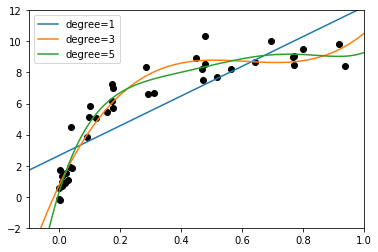

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test= PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label= 'degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

c:\program files (x86)\python\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


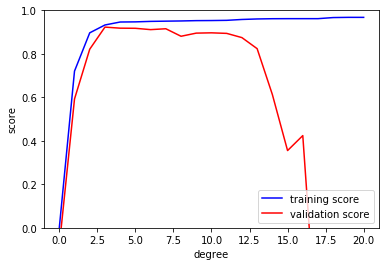

In [13]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

(-0.05673314103942452,
 0.99426363313563404,
 -0.74599431209708067,
 10.918045992764213)

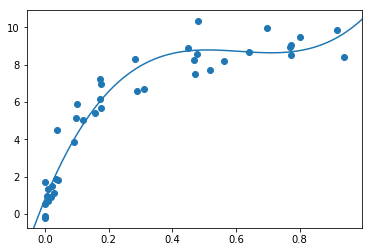

In [14]:
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

**Learning Curves**

With this we are able to determine if more training data would be helpful for our model or not.

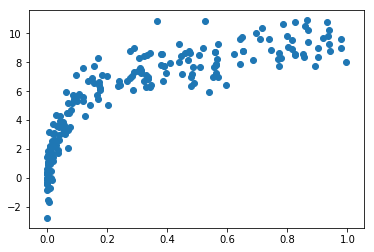

In [15]:
X2,y2 = make_data(200)
plt.scatter(X2.ravel(),y2);

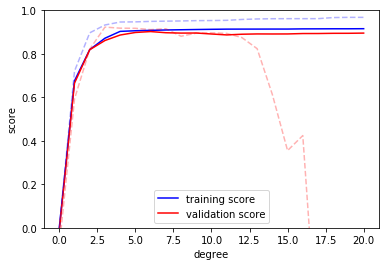

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

We can see that, that with a larger training dataset, we were able to train a model which is much more complicated 

Validation curve has 2 important input, model complexity and the number of training points. 

**Learning curves in Scikit-Learn**

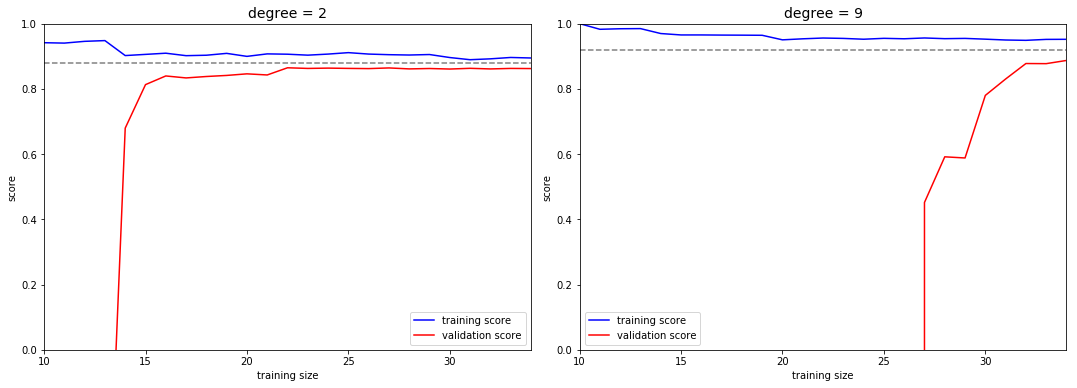

In [17]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)

for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1], color = 'gray', linestyle ='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree),size=14)
    ax[i].legend(loc='best')   
    

**Validation in practice**
Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [25]:
grid.fit(X, y);

In [26]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.99426363313563404,
 -0.74599431209708067,
 10.918045992764213)

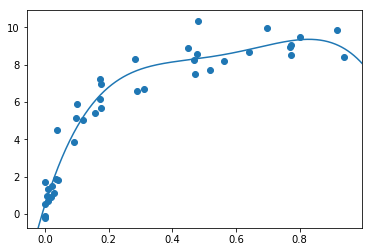

In [31]:
model = grid.best_estimator_

plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

With GridSearch we are able to find the best settings for our model. It makes it easy to come up with the best solution for our task. 